In [1]:
import numpy as np
from scipy.optimize import curve_fit
from scipy.special import erf

import matplotlib.pyplot as plt

In [2]:
step = 0.500 # mm
power = np.asarray([84.4, 84.4, 84.4, 84.1, 83.7, 82.1, 77.2, 65.6, 48.7, 32.5, 19.2, 10.3, 5.4, 2.9, 1.5, 0.7, 0.3, 0.1,
                   0.1, 0.1]) # mW

### Define the model for fitting

In [3]:
def direction(power):
    return (np.sign(power[0] - power[-1]))

In [4]:
# See, e.g., Equation 2 in https://opg.optica.org/ao/fulltext.cfm?uri=ao-52-16-3849&id=255405
def model(y, alpha, w, y0, bg, direction):
    return (1/4.) * np.pi * alpha * w * w * (direction * erf(np.sqrt(2)*(y-y0)/w) + 1) + bg

In [8]:
def fit_beam_size(step, power, guess=[80/np.pi, 0.7, 2e-5, 0]):
    _direction = direction(power)
    power = np.asarray(power)
    
    # Positions of each measurement
    y = -1 * np.arange(power.size) * step
    popt, pcov = curve_fit(lambda y, alpha, w, y0, bg: model(y, alpha, w, y0, bg, _direction)
                           , y, power, p0=guess, maxfev=5000)

    # `alpha`: normalized total power,
    # `w`: beam size,
    # `y0`: beam center,
    # `bg`: background
    return popt

### Fit and plot the result

In [9]:
alpha, w, y0, bg = fit_beam_size(step, power)
print(alpha, w, y0, bg)

13.514471790573012 1.988223425782133 -4.218307468793426 0.8883532930046766


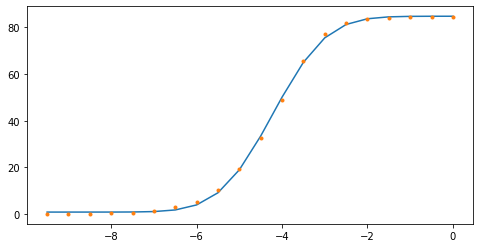

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))

y = -1 * np.arange(power.size) * step
ax.plot(y, model(y, alpha, w, y0, bg, direction(power)))
ax.plot(y, power, '.')

## Z direction

In [11]:
zstep = 0.500 # mm
zpower = np.asarray([83.8, 83.7, 83.7, 83.7, 83.5, 83.0, 81.0, 74.9, 62.2, 45.4, 28.0, 14.8, 6.8, 2.9, 1.1, 0.4, 0.2, 0.1, 0.1]) # mW

In [12]:
alpha, w, y0, bg = fit_beam_size(zstep, zpower)
print(alpha, w, y0, bg)

15.348389614916472 1.8599884066969983 -4.603567922261079 0.5081938388967456


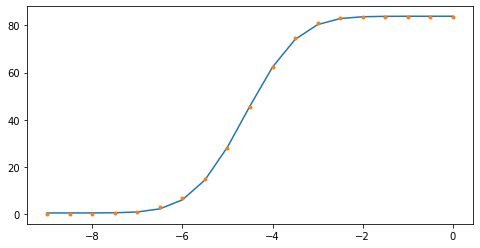

In [14]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))

y = -1 * np.arange(zpower.size) * zstep
ax.plot(y, model(y, alpha, w, y0, bg, direction(power)))
ax.plot(y, zpower, '.')